In [182]:
import random
import matplotlib.pyplot as plt


MAX_WEIGHT = 750 # 定義背包的最大承重量

# 定義物品的重量和價值
weights = [70, 73, 77, 80, 82, 87, 90, 94, 98, 106, 110, 113, 115, 118, 120]
values = [135, 139, 149, 150, 156, 163, 173, 184, 192, 201, 210, 214, 221, 229, 240]


num_items = len(weights) # 計算物品的個数


iteration_values = [] # 記錄每次迭代的最佳價值

# 定義一個解 0/1 背包問題的函數
def solve_knapsack(weights, values, max_weight):
    # 設定隨機初始解
    solution = [0] * num_items
    for i in range(2):
            solution[random.randint(0, len(weights)-1)]=1
    # 定義計算當前價值的函數
    def calc_value(solution):
        total_weight = 0
        total_value = 0
        for i in range(len(solution)):
            if solution[i] == 1:
                total_weight += weights[i]
                total_value += values[i]
        return total_value if total_weight <= max_weight else -float('Inf')
    
    # 定義爬山演算法的函數
    def hill_climbing(solution, max_iterations):
        current_value = calc_value(solution) # 記錄目前價值
        best_solution=solution.copy() # 記錄最佳解
        best_value=current_value # 記錄最佳解的價值
        for _ in range(max_iterations):
            current_value = calc_value(solution)
            while True:
                choose = random.randint(0, num_items-1)
                if solution[choose]==0:
                    break
            temp_solution=solution.copy()
            # 將物品放入背包
            temp_solution[choose] = 1
            new_value = calc_value(temp_solution)
            # 如果新的狀態比當前狀態更好，就用新的狀態
            if new_value > current_value:
                solution=temp_solution.copy()
                if new_value > best_value:
                    best_solution = temp_solution.copy()
                    best_value = new_value
            else:
                # 如果新的狀態比當前狀態更不好，取出鋼放入的物品，並額外取出一個
                takeOutCount=0
                while takeOutCount<1:
                    choose = random.randint(0, num_items-1)
                    if solution[choose]==1:
                        solution[choose]=0
                        takeOutCount+=1
            iteration_values.append(best_value)
        return best_solution
    return hill_climbing(solution, 500) # 執行爬山演算法，並返回最終的物品狀態

#執行求解 0/1 背包問題的函數
result = solve_knapsack(weights, values, MAX_WEIGHT)

#計算最終的價值
total_value = sum([values[i] for i in range(len(result)) if result[i] == 1])

#印出最終的物品狀態和價值
print(result)
print(total_value)

[1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1]
1458


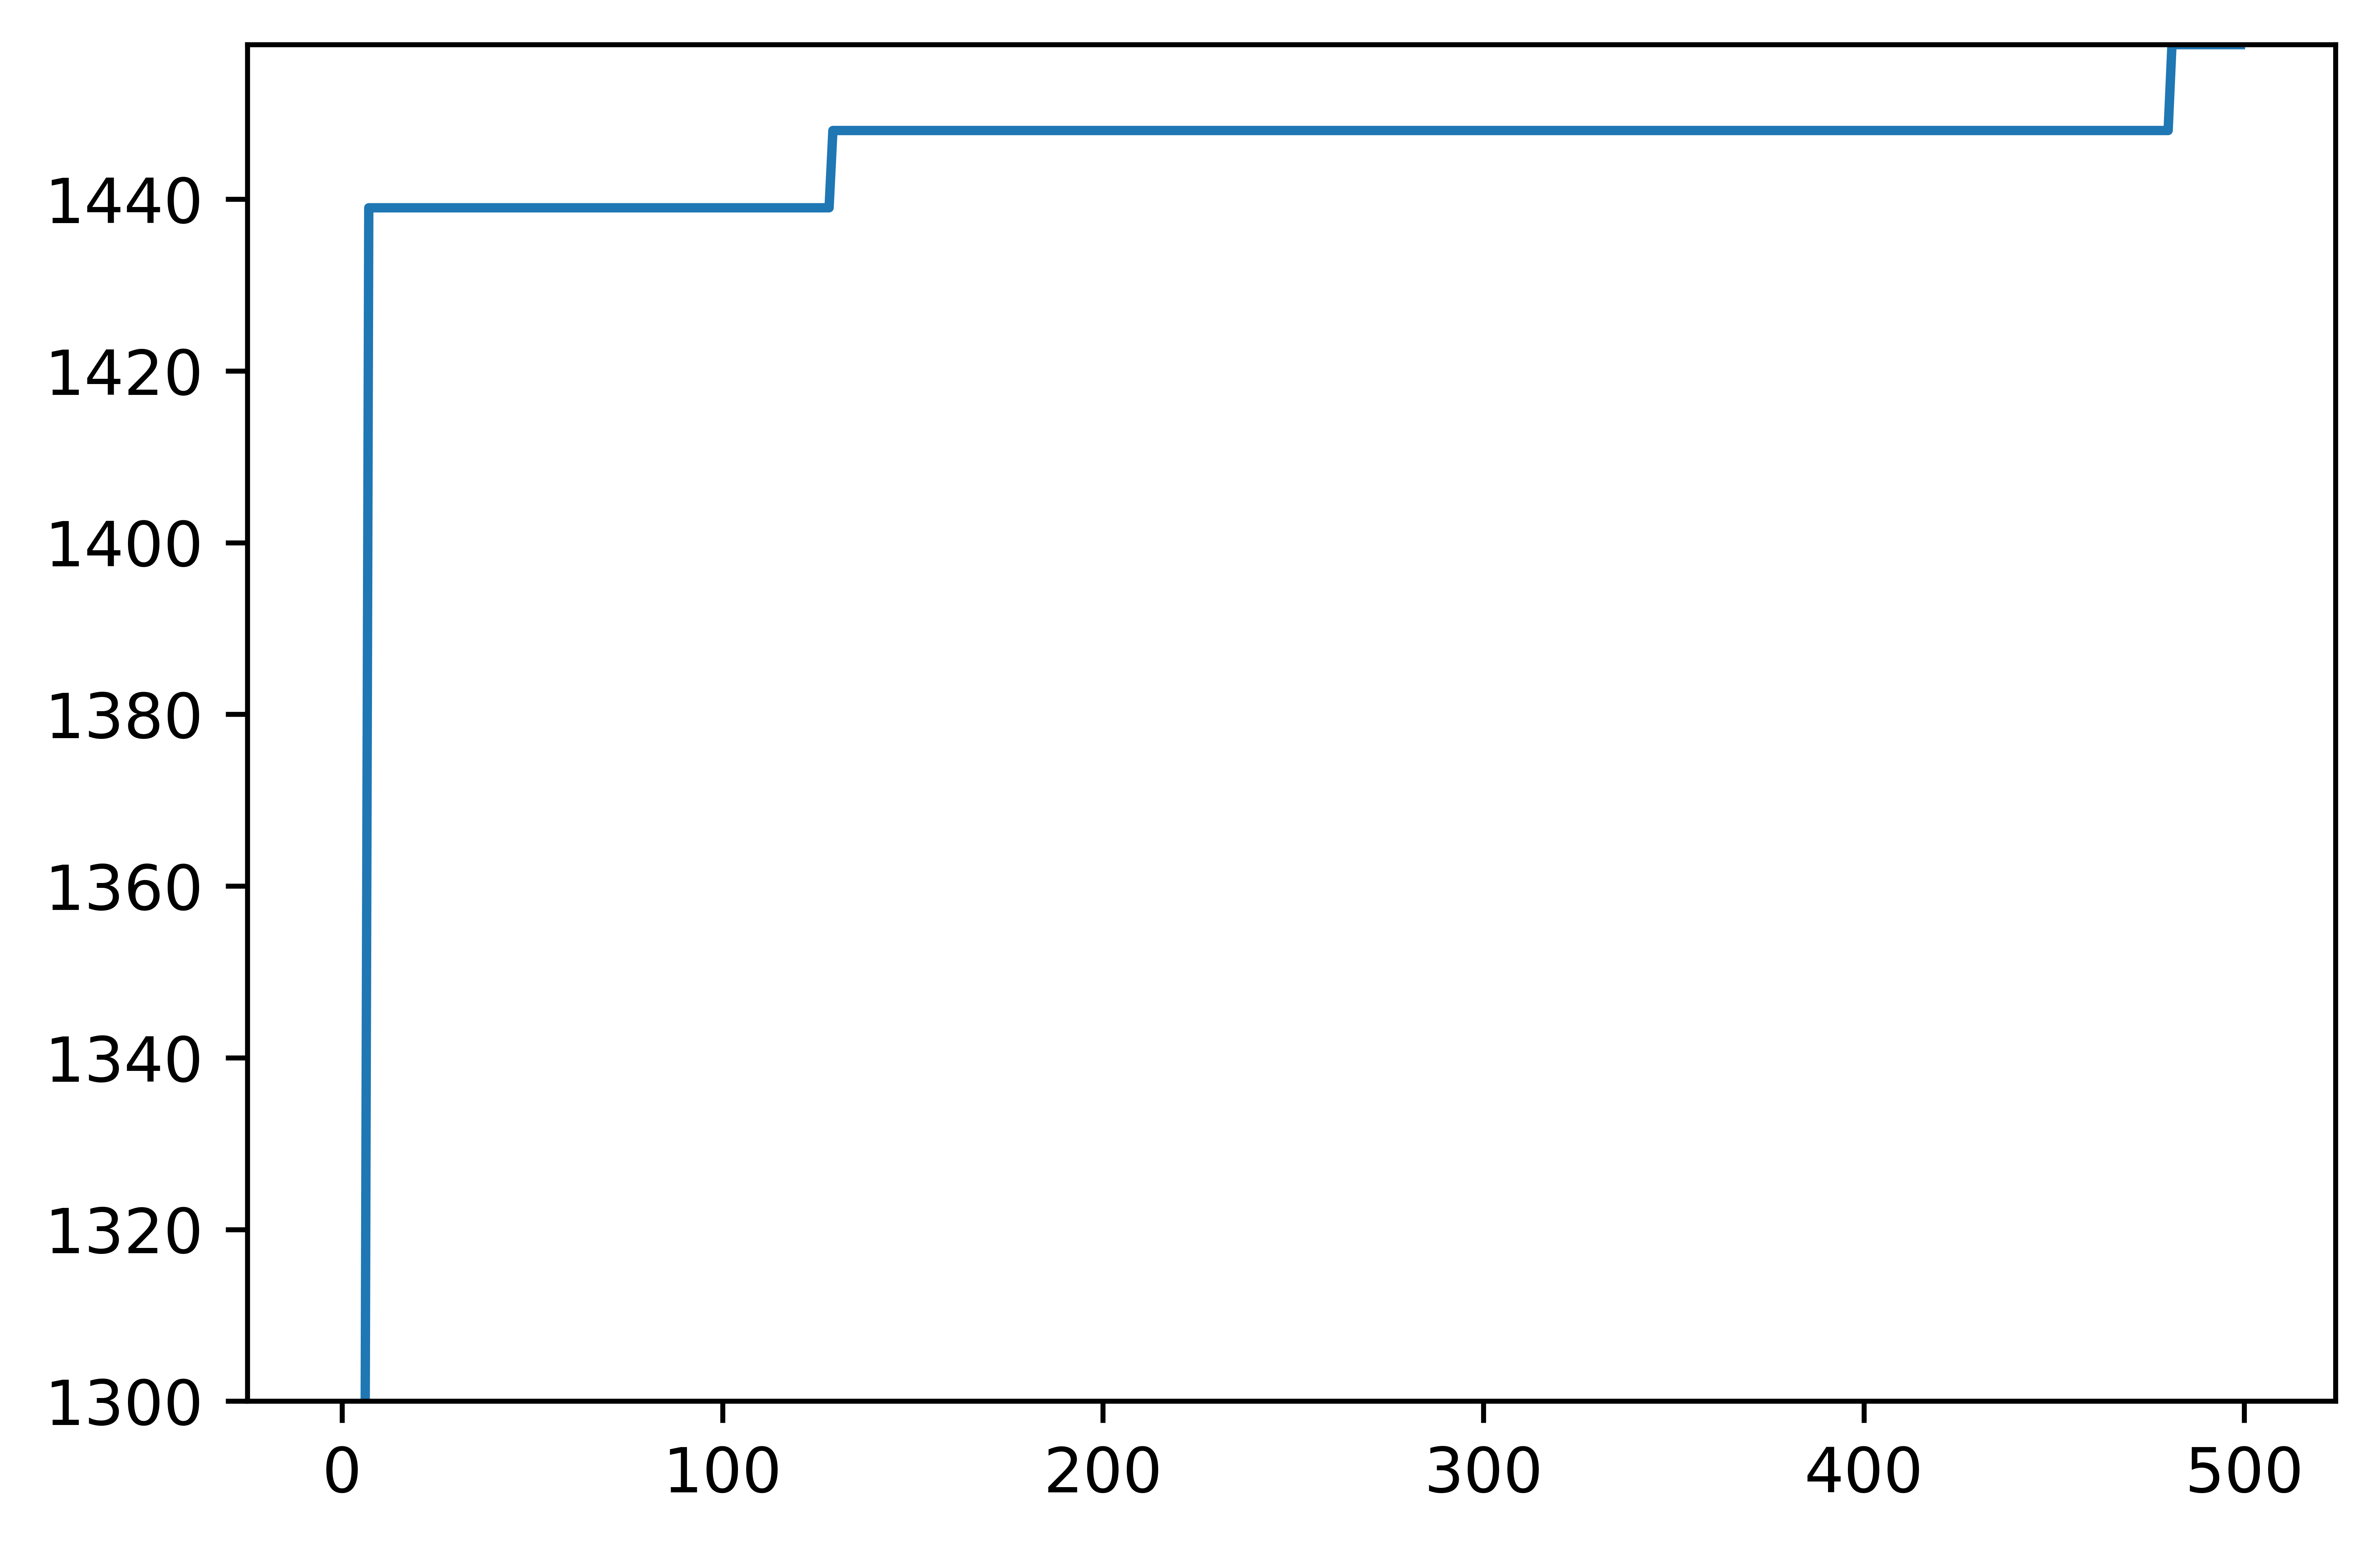

In [183]:
#畫出收斂圖
plt.figure(dpi=1200)
plt.plot(iteration_values)
plt.ylim([1300, 1458])
plt.show()